In [1]:
# import needed modules
import pandas as pd
import numpy as np
import os, itertools
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn
import random
from tqdm import tqdm

# to plot better figures
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

### Ribo1B

In [2]:
# defining input paths for both dna and ribo
dna_rev_filepath = "/lustre/bio_running/DNA_Ribo_2023/DNA_only_new/f5c_eval_wflags/DNA_only_new.eventalign.rev_strand"
ribo_rev_filepath = "/lustre/bio_running/DNA_Ribo_2023/RIBO1B/f5c_eval_wflags/RIBO1B.eventalign.rev_strand"

In [3]:
# loading downsampled eventalign table into dataframes and collapsing their events (dna)
dna_rev = pd.read_table(dna_rev_filepath+".downsampled.roi.collapsed")
dna_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4979,AGGGCT,00001464-7444-48d1-8a7d-83b1c77578b1,101.999200,0.871264,5
1,M13mp18,4984,TATCAG,00001464-7444-48d1-8a7d-83b1c77578b1,75.220329,2.777443,7
2,M13mp18,4994,CGCATT,00001464-7444-48d1-8a7d-83b1c77578b1,105.012000,4.136426,7
3,M13mp18,4995,GCATTA,00001464-7444-48d1-8a7d-83b1c77578b1,79.896271,1.365376,7
4,M13mp18,5010,AGCCAT,00001464-7444-48d1-8a7d-83b1c77578b1,91.702767,1.486961,3
...,...,...,...,...,...,...,...
45083,M13mp18,4979,AGGGCT,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,95.924747,3.038355,17
45084,M13mp18,4984,TATCAG,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,85.287325,2.948203,4
45085,M13mp18,4994,CGCATT,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,97.232780,6.755742,5
45086,M13mp18,4995,GCATTA,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,77.058136,1.309519,11


In [4]:
# ribo
ribo_rev = pd.read_table(ribo_rev_filepath+".downsampled.roi.collapsed")
ribo_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4979,AGGGCT,0004b90a-8111-4d66-bd98-b4a079f91418,101.047120,1.882532,5
1,M13mp18,4984,TATCAG,0004b90a-8111-4d66-bd98-b4a079f91418,76.254175,1.861601,8
2,M13mp18,4994,CGCATT,0004b90a-8111-4d66-bd98-b4a079f91418,105.830317,2.990218,12
3,M13mp18,4995,GCATTA,0004b90a-8111-4d66-bd98-b4a079f91418,77.586042,1.641725,38
4,M13mp18,5010,AGCCAT,0004b90a-8111-4d66-bd98-b4a079f91418,83.085500,3.308842,14
...,...,...,...,...,...,...,...
38709,M13mp18,4979,AGGGCT,fffc50fc-2fe9-406b-9349-5842a98657b7,100.792167,3.546476,6
38710,M13mp18,4984,TATCAG,fffc50fc-2fe9-406b-9349-5842a98657b7,80.039680,2.358222,5
38711,M13mp18,4994,CGCATT,fffc50fc-2fe9-406b-9349-5842a98657b7,103.330246,4.113581,13
38712,M13mp18,4995,GCATTA,fffc50fc-2fe9-406b-9349-5842a98657b7,77.520100,1.137058,10


In [5]:
# convert to 1-based
dna_rev["position"] += 1
dna_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4980,AGGGCT,00001464-7444-48d1-8a7d-83b1c77578b1,101.999200,0.871264,5
1,M13mp18,4985,TATCAG,00001464-7444-48d1-8a7d-83b1c77578b1,75.220329,2.777443,7
2,M13mp18,4995,CGCATT,00001464-7444-48d1-8a7d-83b1c77578b1,105.012000,4.136426,7
3,M13mp18,4996,GCATTA,00001464-7444-48d1-8a7d-83b1c77578b1,79.896271,1.365376,7
4,M13mp18,5011,AGCCAT,00001464-7444-48d1-8a7d-83b1c77578b1,91.702767,1.486961,3
...,...,...,...,...,...,...,...
45083,M13mp18,4980,AGGGCT,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,95.924747,3.038355,17
45084,M13mp18,4985,TATCAG,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,85.287325,2.948203,4
45085,M13mp18,4995,CGCATT,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,97.232780,6.755742,5
45086,M13mp18,4996,GCATTA,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,77.058136,1.309519,11


In [6]:
ribo_rev["position"] += 1
ribo_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4980,AGGGCT,0004b90a-8111-4d66-bd98-b4a079f91418,101.047120,1.882532,5
1,M13mp18,4985,TATCAG,0004b90a-8111-4d66-bd98-b4a079f91418,76.254175,1.861601,8
2,M13mp18,4995,CGCATT,0004b90a-8111-4d66-bd98-b4a079f91418,105.830317,2.990218,12
3,M13mp18,4996,GCATTA,0004b90a-8111-4d66-bd98-b4a079f91418,77.586042,1.641725,38
4,M13mp18,5011,AGCCAT,0004b90a-8111-4d66-bd98-b4a079f91418,83.085500,3.308842,14
...,...,...,...,...,...,...,...
38709,M13mp18,4980,AGGGCT,fffc50fc-2fe9-406b-9349-5842a98657b7,100.792167,3.546476,6
38710,M13mp18,4985,TATCAG,fffc50fc-2fe9-406b-9349-5842a98657b7,80.039680,2.358222,5
38711,M13mp18,4995,CGCATT,fffc50fc-2fe9-406b-9349-5842a98657b7,103.330246,4.113581,13
38712,M13mp18,4996,GCATTA,fffc50fc-2fe9-406b-9349-5842a98657b7,77.520100,1.137058,10


In [7]:
# add sample/run label
dna_rev["run"] = "DNA"
ribo_rev["run"] = "RIBO"

### Produce mixed datasets

In [8]:
mixed_datasets = {}
for perc in [80, 60, 40, 20]:
    perc_ribo = 100-perc
    # take perc reads from dna and 100-perc from ribo
    print(f"Producing mix_dna_ribo_{perc}_{perc_ribo}")
    dna_reads = random.sample(set(dna_rev["read_name"].values), perc*100, )
    ribo_reads = random.sample(set(ribo_rev["read_name"].values), perc_ribo*100)
    print(len(dna_reads), len(ribo_reads), len(dna_reads)+len(ribo_reads))
    dna_rev_subsample = dna_rev[dna_rev['read_name'].isin(dna_reads)]
    ribo_rev_subsample = ribo_rev[ribo_rev['read_name'].isin(ribo_reads)]
    # append to dictionary of mixed datasets
    mixed_datasets[f"mix_dna_ribo_{perc}_{perc_ribo}"] = pd.concat([dna_rev_subsample, ribo_rev_subsample]).reset_index(drop=True)
    print(mixed_datasets[f"mix_dna_ribo_{perc}_{perc_ribo}"]["run"].value_counts())
    print()
# add mix_dna_ribo_100_0 and mix_dna_ribo_0_100
mixed_datasets["mix_dna_ribo_100_0"] = dna_rev.copy()
mixed_datasets["mix_dna_ribo_0_100"] = ribo_rev.copy()
mixed_datasets

Producing mix_dna_ribo_80_20
8000 2000 10000
DNA     36366
RIBO     8350
Name: run, dtype: int64

Producing mix_dna_ribo_60_40
6000 4000 10000
DNA     27242
RIBO    16735
Name: run, dtype: int64

Producing mix_dna_ribo_40_60
4000 6000 10000
RIBO    25205
DNA     18227
Name: run, dtype: int64

Producing mix_dna_ribo_20_80
2000 8000 10000
RIBO    33467
DNA      9043
Name: run, dtype: int64



{'mix_dna_ribo_80_20':         contig  position reference_kmer                             read_name  \
 0      M13mp18      4980         AGGGCT  00001464-7444-48d1-8a7d-83b1c77578b1   
 1      M13mp18      4985         TATCAG  00001464-7444-48d1-8a7d-83b1c77578b1   
 2      M13mp18      4995         CGCATT  00001464-7444-48d1-8a7d-83b1c77578b1   
 3      M13mp18      4996         GCATTA  00001464-7444-48d1-8a7d-83b1c77578b1   
 4      M13mp18      5011         AGCCAT  00001464-7444-48d1-8a7d-83b1c77578b1   
 ...        ...       ...            ...                                   ...   
 44711  M13mp18      4996         GCATTA  ff54f7be-0d5b-4aec-bf38-57c1adaab182   
 44712  M13mp18      5011         AGCCAT  ff54f7be-0d5b-4aec-bf38-57c1adaab182   
 44713  M13mp18      4985         TATCAG  ffdfff08-b857-487d-be68-3c582ae451a9   
 44714  M13mp18      4995         CGCATT  ffdfff08-b857-487d-be68-3c582ae451a9   
 44715  M13mp18      4996         GCATTA  ffdfff08-b857-487d-be68-3c582ae451

### Currents intensities

In [9]:
# define altered sites coordinates and its corresponding actual incorporation site for currents (1-based)
sites_curr = [4980, 4995, 5011]
actual_sites = [4984, 4998, 5016]

Processing Actual site: 4984 on altered position: M13mp18:4980
mix_dna_ribo_100_0 (9143, 8)
mix_dna_ribo_80_20 (9077, 8)
mix_dna_ribo_60_40 (8950, 8)
mix_dna_ribo_40_60 (8827, 8)
mix_dna_ribo_20_80 (8682, 8)
mix_dna_ribo_0_100 (7916, 8)


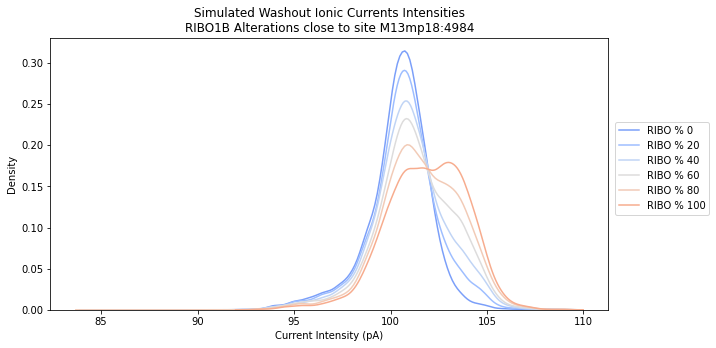

Processing Actual site: 4998 on altered position: M13mp18:4995
mix_dna_ribo_100_0 (9367, 8)
mix_dna_ribo_80_20 (9391, 8)
mix_dna_ribo_60_40 (9337, 8)
mix_dna_ribo_40_60 (9321, 8)
mix_dna_ribo_20_80 (9221, 8)
mix_dna_ribo_0_100 (8488, 8)


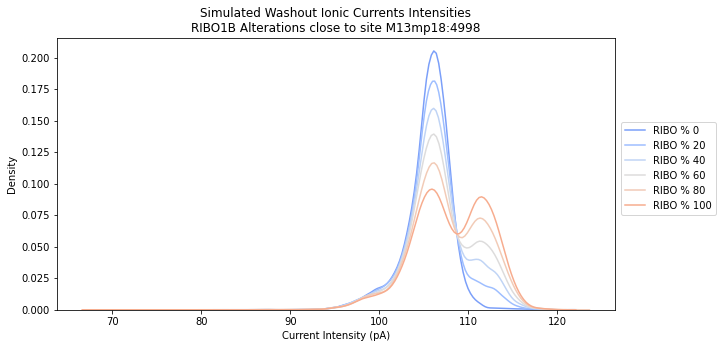

Processing Actual site: 5016 on altered position: M13mp18:5011
mix_dna_ribo_100_0 (8162, 8)
mix_dna_ribo_80_20 (7683, 8)
mix_dna_ribo_60_40 (7123, 8)
mix_dna_ribo_40_60 (6641, 8)
mix_dna_ribo_20_80 (6002, 8)
mix_dna_ribo_0_100 (5074, 8)


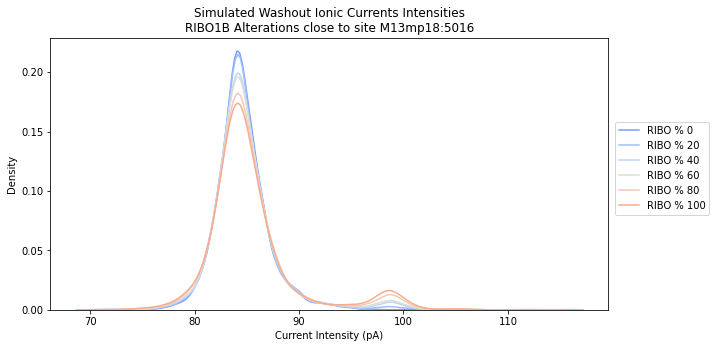

In [10]:
colors = plt.get_cmap('coolwarm')(np.linspace(0.2, 0.7, len(mixed_datasets.keys())))

for s_, as_ in zip(sites_curr, actual_sites):
    print(f"Processing Actual site: {as_} on altered position: M13mp18:{s_}")
    plt.figure(figsize=(10,5))
    for mix,color, perc in zip([f"mix_dna_ribo_{perc}_{100-perc}" for perc in [100,80,60,40,20,0]], colors, [100,80,60,40,20,0]):
        print(mix, mixed_datasets[mix].query(f"position == {s_}").shape)
        sn.kdeplot(data=mixed_datasets[mix].query(f"position == {s_}"), x="event_level_mean", label=f"RIBO % {100-perc}", color=color)
    plt.legend(bbox_to_anchor=(1.19, 0.71))
    plt.xlabel("Current Intensity (pA)")
    plt.title(f"Simulated Washout Ionic Currents Intensities\nRIBO1B Alterations close to site M13mp18:{as_}")
    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1B_site_M13mp18_{as_}.reverse.ionic_currents.tiff", 
                dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

Processing Actual site: 4984 on altered position: M13mp18:4980
Processing Actual site: 4998 on altered position: M13mp18:4995
Processing Actual site: 5016 on altered position: M13mp18:5011


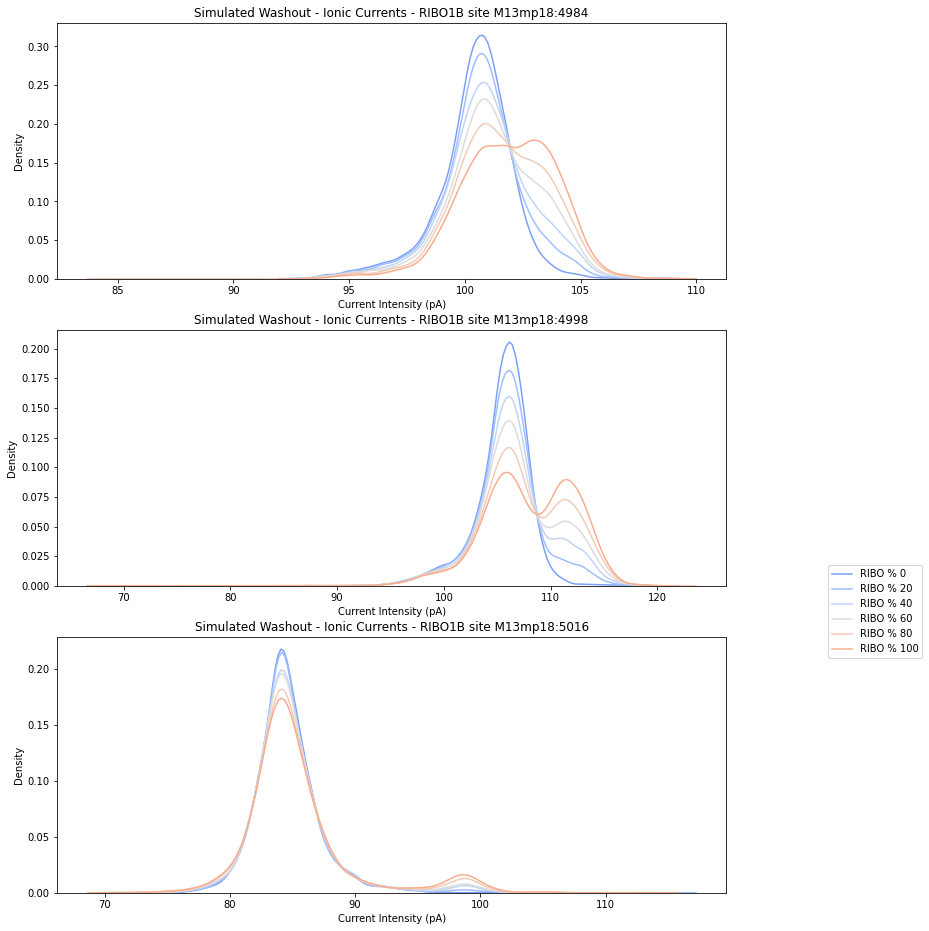

In [11]:
# produce a single plot for currents
colors = plt.get_cmap('coolwarm')(np.linspace(0.2, 0.7, len(mixed_datasets.keys())))

n_rows=3
n_cols=1
axes_pos = list([i for i in range(n_rows)])
f, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,16))
for s_, as_, ax_pos in zip(sites_curr, actual_sites, axes_pos):
    print(f"Processing Actual site: {as_} on altered position: M13mp18:{s_}")
    for mix,color, perc in zip([f"mix_dna_ribo_{perc}_{100-perc}" for perc in [100,80,60,40,20,0]], colors, [100,80,60,40,20,0]):
        #print(mix, mixed_datasets[mix].query(f"position == {s_}").shape)
        sn.kdeplot(data=mixed_datasets[mix].query(f"position == {s_}"), 
                   x="event_level_mean", 
                   label=f"RIBO % {100-perc}", 
                   color=color,
                   ax=axes[ax_pos])
    axes[ax_pos].set_xlabel("Current Intensity (pA)")
    axes[ax_pos].set_title(f"Simulated Washout - Ionic Currents - RIBO1B site M13mp18:{as_}")

plt.legend(bbox_to_anchor=(1.3, 1.3))
# save image to disk
plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1B_site_M13mp18_all_contexts.reverse.ionic_currents.tiff", 
                dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
plt.show()

### Dwell times

In [12]:
# define altered sites coordinates and its corresponding actual incorporation site for currents (1-based)
sites_curr = [4985, 4996, 5011]
actual_sites = [4984, 4998, 5016]

In [13]:
colors = plt.get_cmap('coolwarm')(np.linspace(0.2, 0.7, len(mixed_datasets.keys())))

# merge into uniq dataset
mixed_datasets_merged = []
for perc in [100,80,60,40,20,0]:
    mix = mixed_datasets[f"mix_dna_ribo_{perc}_{100-perc}"].copy()
    mix["RIBO_Perc"] = 100-perc
    mixed_datasets_merged.append(mix)
mixed_datasets_merged = pd.concat(mixed_datasets_merged).reset_index(drop=True)
mixed_datasets_merged

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell,run,RIBO_Perc
0,M13mp18,4980,AGGGCT,00001464-7444-48d1-8a7d-83b1c77578b1,101.999200,0.871264,5,DNA,0
1,M13mp18,4985,TATCAG,00001464-7444-48d1-8a7d-83b1c77578b1,75.220329,2.777443,7,DNA,0
2,M13mp18,4995,CGCATT,00001464-7444-48d1-8a7d-83b1c77578b1,105.012000,4.136426,7,DNA,0
3,M13mp18,4996,GCATTA,00001464-7444-48d1-8a7d-83b1c77578b1,79.896271,1.365376,7,DNA,0
4,M13mp18,5011,AGCCAT,00001464-7444-48d1-8a7d-83b1c77578b1,91.702767,1.486961,3,DNA,0
...,...,...,...,...,...,...,...,...,...
258432,M13mp18,4980,AGGGCT,fffc50fc-2fe9-406b-9349-5842a98657b7,100.792167,3.546476,6,RIBO,100
258433,M13mp18,4985,TATCAG,fffc50fc-2fe9-406b-9349-5842a98657b7,80.039680,2.358222,5,RIBO,100
258434,M13mp18,4995,CGCATT,fffc50fc-2fe9-406b-9349-5842a98657b7,103.330246,4.113581,13,RIBO,100
258435,M13mp18,4996,GCATTA,fffc50fc-2fe9-406b-9349-5842a98657b7,77.520100,1.137058,10,RIBO,100


In [14]:
# save on disk
for s_, as_ in zip(sites_curr, actual_sites):
    mixed_datasets_merged.to_csv(f"/lustre/biomed/ForBruno/sim_washout_DNA_vs_RIBO1B_site_M13mp18_{as_}.reverse.dwell_times.tsv", sep="\t", index=None)

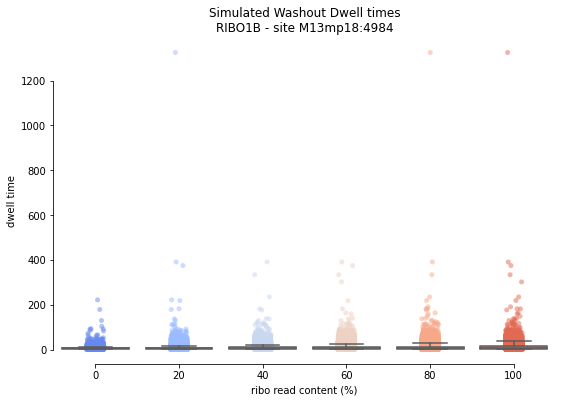

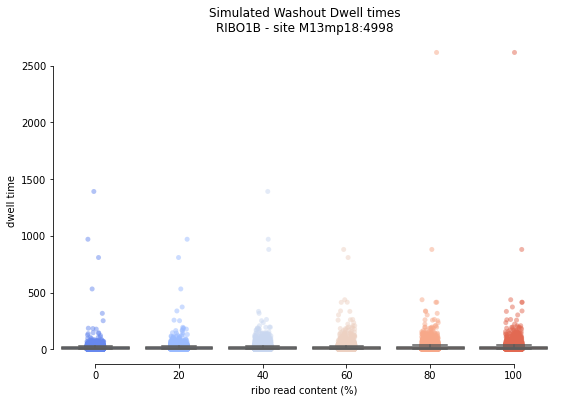

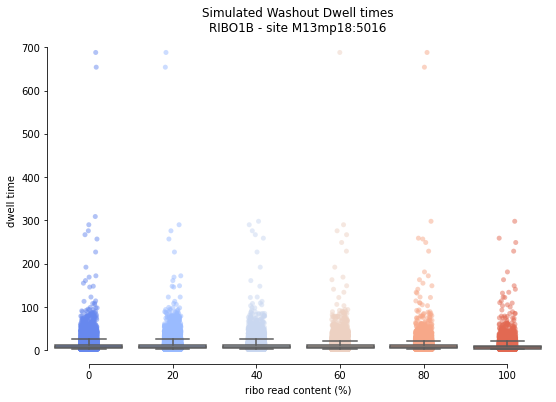

In [15]:
for s_, as_ in zip(sites_curr, actual_sites):
    plt.figure(figsize=(9,6))
    sn.stripplot(data=mixed_datasets_merged.query(f"position == {s_}"), x="RIBO_Perc", y="dwell", zorder=0, palette="coolwarm", alpha=.5)
    sn.boxplot(data=mixed_datasets_merged.query(f"position == {s_}"), 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", showfliers=False)
    plt.ylabel("dwell time")
    plt.xlabel("ribo read content (%)")
    plt.title(f"Simulated Washout Dwell times\nRIBO1B - site M13mp18:{as_}")
    sn.despine(trim=True)
    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1B_site_M13mp18_{as_}.reverse.dwell_times.V1.tiff", 
                dpi=600, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

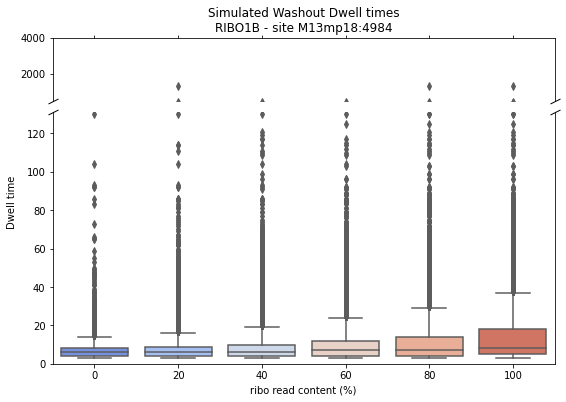

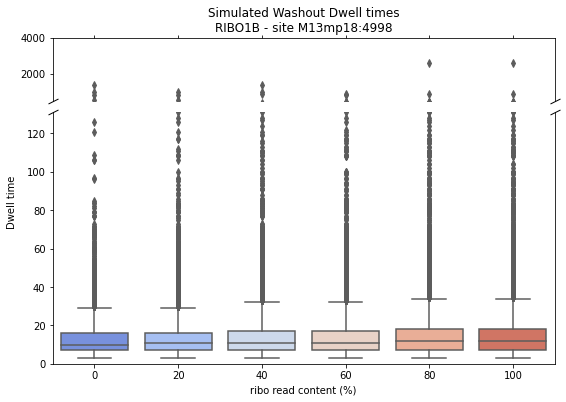

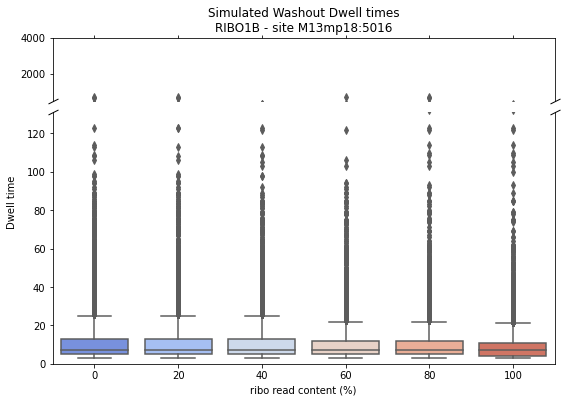

In [16]:
# with broken y axis
for s_, as_ in zip(sites_curr, actual_sites):
    f, (ax, ax2) = plt.subplots(2,1, sharex=True, facecolor='w', figsize=(9,6), gridspec_kw={'height_ratios': [0.5, 2]})
    f.subplots_adjust(hspace=0.075)

    sn.boxplot(data=mixed_datasets_merged.query(f"position == {s_}"), 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", ax=ax)
    sn.boxplot(data=mixed_datasets_merged.query(f"position == {s_}"), 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", ax=ax2)
    ax.set(xlabel=None)

    # set limits
    ax2.set_ylim(0, 131)
    ax.set_ylim(500, 4000)

    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    # hide ticks
    ax.xaxis.tick_bottom()
    ax.xaxis.tick_top()
    ax.set(ylabel=None)
    ax2.set(ylabel=None)

    f.text(0.055, 0.5, 'Dwell time', va='center', rotation='vertical', )
    ax2.set_xlabel("ribo read content (%)")
    ax.set_title(f'Simulated Washout Dwell times\nRIBO1B - site M13mp18:{as_}')

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1B_site_M13mp18_{as_}.reverse.dwell_times.V2.tiff", 
                dpi=600, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

4985
5.0 18.0 34.5


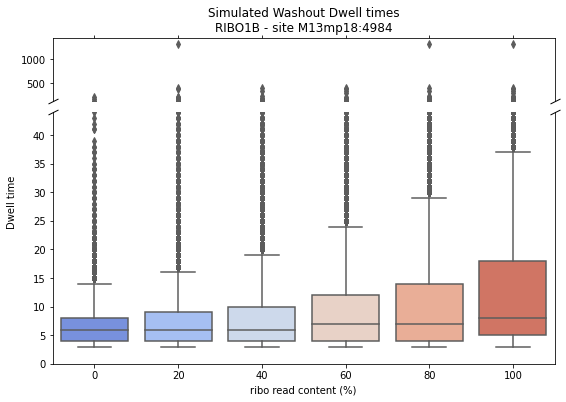

4996
7.0 18.0 37.5


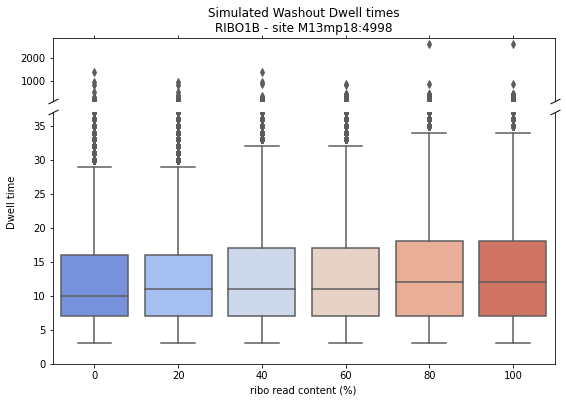

5011
4.0 11.0 22.5


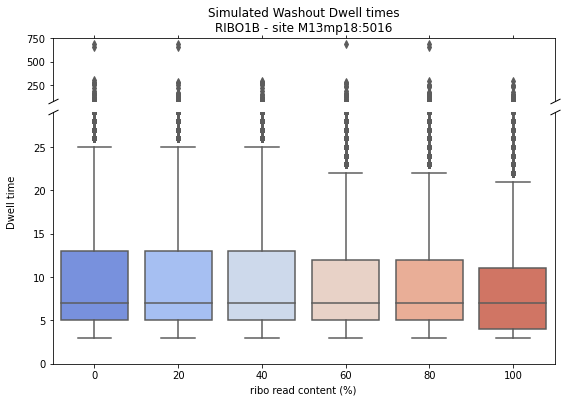

In [17]:
# with broken y axis (v2 dynamic)
for s_, as_ in zip(sites_curr, actual_sites):
    print(s_)
    f, (ax, ax2) = plt.subplots(2,1, sharex=True, facecolor='w', figsize=(9,6), gridspec_kw={'height_ratios': [0.5, 2]})
    f.subplots_adjust(hspace=0.075)
    max_ = mixed_datasets_merged.query(f"position == {s_}")["dwell"].max()
    perc25 = mixed_datasets_merged.query(f"position == {s_}").query("RIBO_Perc == 100")["dwell"].describe()["25%"]
    perc75 = mixed_datasets_merged.query(f"position == {s_}").query("RIBO_Perc == 100")["dwell"].describe()["75%"]
    iqr = (perc25+perc75)*1.5
    print(perc25, perc75, iqr)
    
    sn.boxplot(data=mixed_datasets_merged.query(f"position == {s_}"), 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", ax=ax)
    sn.boxplot(data=mixed_datasets_merged.query(f"position == {s_}"), 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", ax=ax2)
    ax.set(xlabel=None)
    
    # set limits
    if s_ == 4996:
        ax2.set_ylim(0, 37)
    else:
        ax2.set_ylim(0, int(iqr*1.3))
    ax.set_ylim(int(iqr*4), int(max_*1.1))
    
    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    # hide ticks
    ax.xaxis.tick_bottom()
    ax.xaxis.tick_top()
    ax.set(ylabel=None)
    ax2.set(ylabel=None)

    f.text(0.055, 0.5, 'Dwell time', va='center', rotation='vertical', )
    ax2.set_xlabel("ribo read content (%)")
    ax.set_title(f'Simulated Washout Dwell times\nRIBO1B - site M13mp18:{as_}')

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1B_site_M13mp18_{as_}.reverse.dwell_times.V2dynamic.tiff", 
                dpi=600, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

4985
5.0 18.0 34.5


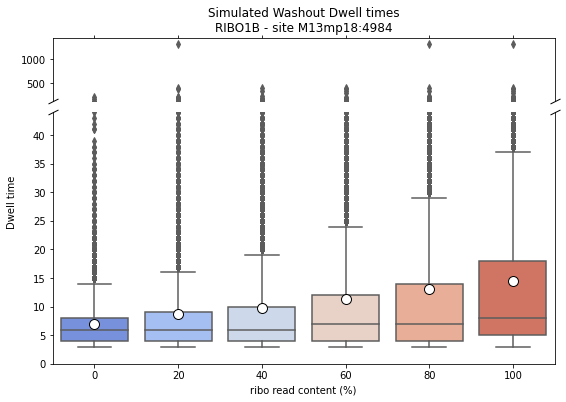

4996
7.0 18.0 37.5


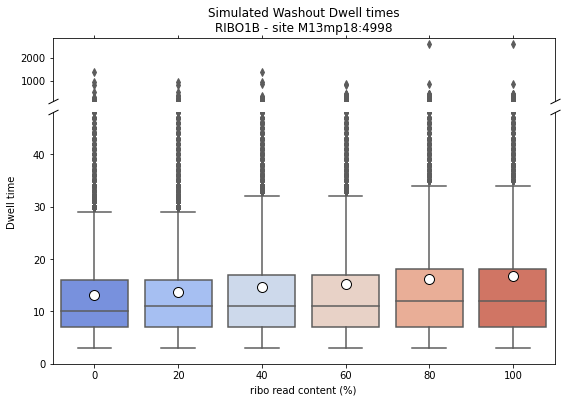

5011
4.0 11.0 22.5


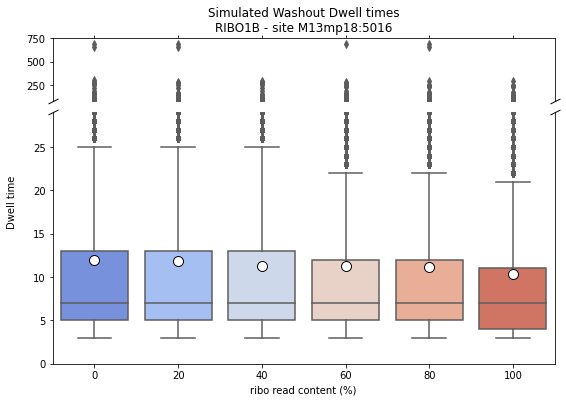

In [18]:
# with broken y axis (v2 dynamic w mean)
for s_, as_ in zip(sites_curr, actual_sites):
    print(s_)
    f, (ax, ax2) = plt.subplots(2,1, sharex=True, facecolor='w', figsize=(9,6), gridspec_kw={'height_ratios': [0.5, 2]})
    f.subplots_adjust(hspace=0.075)
    max_ = mixed_datasets_merged.query(f"position == {s_}")["dwell"].max()
    perc25 = mixed_datasets_merged.query(f"position == {s_}").query("RIBO_Perc == 100")["dwell"].describe()["25%"]
    perc75 = mixed_datasets_merged.query(f"position == {s_}").query("RIBO_Perc == 100")["dwell"].describe()["75%"]
    iqr = (perc25+perc75)*1.5
    print(perc25, perc75, iqr)
    
    sn.boxplot(data=mixed_datasets_merged.query(f"position == {s_}"), 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", ax=ax)
    sn.boxplot(data=mixed_datasets_merged.query(f"position == {s_}"), 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", ax=ax2, showmeans=True, 
               meanprops={"marker":"o",
                          "markerfacecolor":"white", 
                          "markeredgecolor":"black",
                          "markersize":"10"})
    ax.set(xlabel=None)
    
    # set limits
    ax2.set_ylim(0, int(iqr*1.3))
    ax.set_ylim(int(iqr*4), int(max_*1.1))
    
    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    # hide ticks
    ax.xaxis.tick_bottom()
    ax.xaxis.tick_top()
    ax.set(ylabel=None)
    ax2.set(ylabel=None)

    f.text(0.055, 0.5, 'Dwell time', va='center', rotation='vertical', )
    ax2.set_xlabel("ribo read content (%)")
    ax.set_title(f'Simulated Washout Dwell times\nRIBO1B - site M13mp18:{as_}')

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1B_site_M13mp18_{as_}.reverse.dwell_times.V2dynamic.means.tiff", 
                dpi=600, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

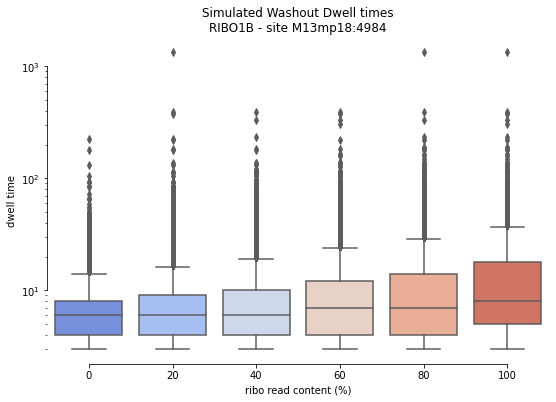

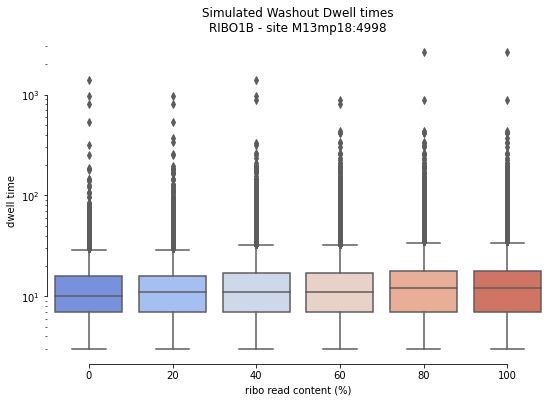

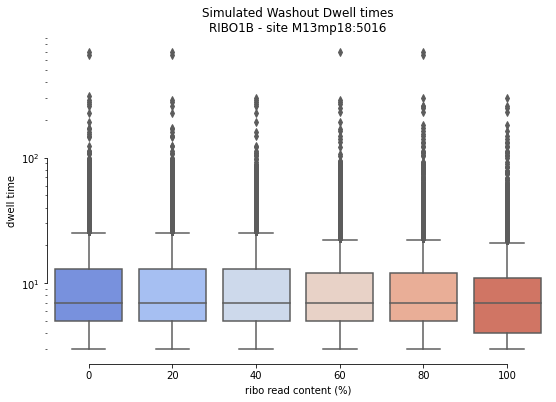

In [19]:
# v3 logscale
for s_, as_ in zip(sites_curr, actual_sites):
    plt.figure(figsize=(9,6))
    df_log = mixed_datasets_merged.query(f"position == {s_}")
    sn.boxplot(data=df_log, 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", showfliers=True)
    plt.yscale("log")
    plt.ylabel("dwell time")
    plt.xlabel("ribo read content (%)")
    plt.title(f"Simulated Washout Dwell times\nRIBO1B - site M13mp18:{as_}")
    sn.despine(trim=True)
    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1B_site_M13mp18_{as_}.reverse.dwell_times.V3logscale.tiff", 
                dpi=600, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

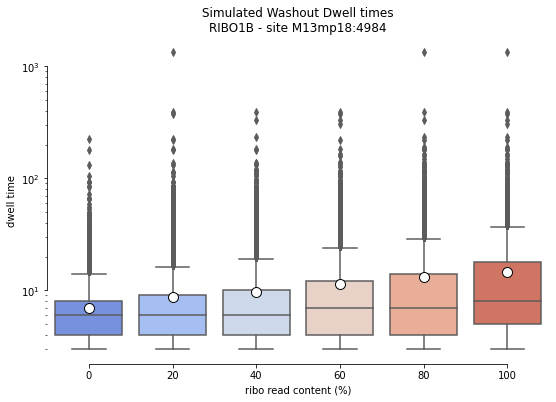

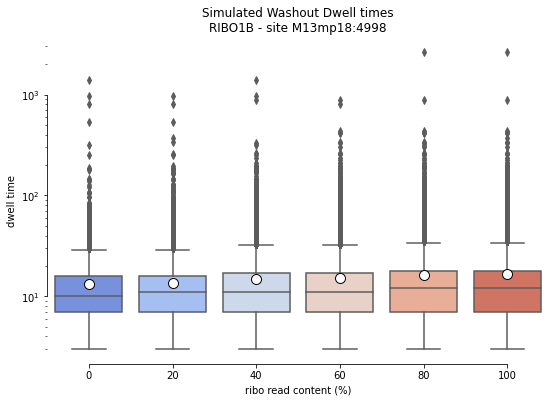

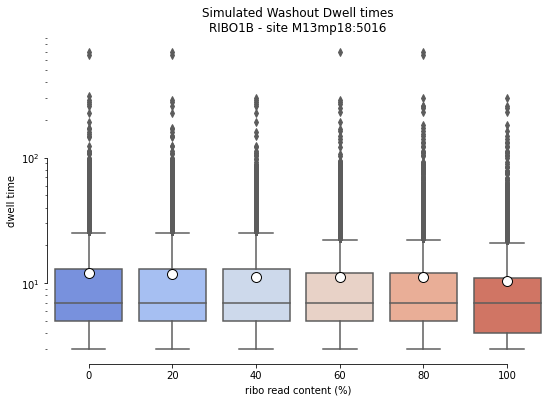

In [20]:
# v3 logscale with means
for s_, as_ in zip(sites_curr, actual_sites):
    plt.figure(figsize=(9,6))
    df_log = mixed_datasets_merged.query(f"position == {s_}")
    sn.boxplot(data=df_log, 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", showfliers=True,
               showmeans=True, 
               meanprops={"marker":"o",
                          "markerfacecolor":"white", 
                          "markeredgecolor":"black",
                          "markersize":"10"})
    plt.yscale("log")
    plt.ylabel("dwell time")
    plt.xlabel("ribo read content (%)")
    plt.title(f"Simulated Washout Dwell times\nRIBO1B - site M13mp18:{as_}")
    sn.despine(trim=True)
    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1B_site_M13mp18_{as_}.reverse.dwell_times.V3logscale.means.tiff", 
                dpi=600, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()